In [185]:
#importing important libraries and reading the file

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

data=pd.read_csv("Solar_Prediction.csv")

data.head()


,Unnamed: 0,UNIXTime,Date,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48.0,30.46,59.0,177.39,5.62,06:13:00,18:13:00
1,1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48.0,30.46,58.0,176.78,3.37,06:13:00,18:13:00
2,2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48.0,30.46,57.0,158.75,3.37,06:13:00,18:13:00
3,3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48.0,30.46,60.0,137.71,3.37,06:13:00,18:13:00
4,4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48.0,30.46,62.0,104.95,5.62,06:13:00,18:13:00


In [186]:
#checking number of rows and columns in the given data
data.shape

(32398, 12)

In [187]:
#info about the given data to see if any null value is present or not
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32398 entries, 0 to 32397
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              32398 non-null  int64  
 1   UNIXTime                32398 non-null  int64  
 2   Date                    32398 non-null  object 
 3   Time                    32398 non-null  object 
 4   Radiation               32398 non-null  float64
 5   Temperature             32198 non-null  float64
 6   Pressure                32249 non-null  float64
 7   Humidity                32173 non-null  float64
 8   WindDirection(Degrees)  32273 non-null  float64
 9   Speed                   32258 non-null  float64
 10  TimeSunRise             32398 non-null  object 
 11  TimeSunSet              32398 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 3.0+ MB


In [188]:

#changing date, time, timeSunRise and timesunset from strings to integers

data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])


data['Year'] = data['datetime'].dt.year
data['Month'] = data['datetime'].dt.month
data['Day'] = data['datetime'].dt.day


data['Hours'] = data['datetime'].dt.hour
data['Minutes'] = data['datetime'].dt.minute
data['Seconds'] = data['datetime'].dt.second



data['sunrise'] = pd.to_datetime(data['TimeSunRise'], format='%H:%M:%S')
data['sunset'] = pd.to_datetime(data['TimeSunSet'], format='%H:%M:%S')


data['sunrise_hour'] = data['sunrise'].dt.hour 
data['sunrise_min']=data['sunrise'].dt.minute

data['sunset_hour'] = data['sunset'].dt.hour 
data['sunset_min']=data['sunset'].dt.minute


data.drop(['Unnamed: 0','Date','Time','datetime','sunrise','sunset','TimeSunRise','TimeSunSet'],axis=1,inplace=True)

data.head()


C:\Users\user\AppData\Local\Temp\ipykernel_4768\1509864442.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])


,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Year,Month,Day,Hours,Minutes,Seconds,sunrise_hour,sunrise_min,sunset_hour,sunset_min
0,1475229326,1.21,48.0,30.46,59.0,177.39,5.62,2016,9,29,23,55,26,6,13,18,13
1,1475229023,1.21,48.0,30.46,58.0,176.78,3.37,2016,9,29,23,50,23,6,13,18,13
2,1475228726,1.23,48.0,30.46,57.0,158.75,3.37,2016,9,29,23,45,26,6,13,18,13
3,1475228421,1.21,48.0,30.46,60.0,137.71,3.37,2016,9,29,23,40,21,6,13,18,13
4,1475228124,1.17,48.0,30.46,62.0,104.95,5.62,2016,9,29,23,35,24,6,13,18,13


In [189]:
#to check how may null values present

data.isnull().sum()

UNIXTime                    0
Radiation                   0
Temperature               200
Pressure                  149
Humidity                  225
WindDirection(Degrees)    125
Speed                     140
Year                        0
Month                       0
Day                         0
Hours                       0
Minutes                     0
Seconds                     0
sunrise_hour                0
sunrise_min                 0
sunset_hour                 0
sunset_min                  0
dtype: int64

In [190]:
#droping all the null values

data=data.dropna()
data.isnull().sum()

UNIXTime                  0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
Year                      0
Month                     0
Day                       0
Hours                     0
Minutes                   0
Seconds                   0
sunrise_hour              0
sunrise_min               0
sunset_hour               0
sunset_min                0
dtype: int64

In [191]:
#finding correlation between different features of data

corr=data.corr()
corr

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Year,Month,Day,Hours,Minutes,Seconds,sunrise_hour,sunrise_min,sunset_hour,sunset_min
UNIXTime,1.000000,-0.077384,-0.365183,-0.331553,-0.069590,0.154640,0.173011,NaN,0.968945,0.303721,0.000403,0.000294,0.243208,NaN,0.981779,-0.817757,0.585982
Radiation,-0.077384,1.000000,0.734147,0.119231,-0.222454,-0.233851,0.076396,NaN,-0.089935,0.033249,0.004426,-0.000336,-0.035983,NaN,-0.088990,0.045139,-0.037763
Temperature,-0.365183,0.734147,1.000000,0.310873,-0.279059,-0.262443,-0.027114,NaN,-0.347448,-0.142440,0.198433,-0.002036,-0.047925,NaN,-0.376864,0.297422,-0.241794
Pressure,-0.331553,0.119231,0.310873,1.000000,-0.223025,-0.231738,-0.083840,NaN,-0.341987,-0.028205,0.090984,0.002799,-0.035279,NaN,-0.380085,0.150912,-0.118778
Humidity,-0.069590,-0.222454,-0.279059,-0.223025,1.000000,-0.001625,-0.216691,NaN,-0.078924,0.026087,0.079165,0.000373,-0.020658,NaN,-0.030223,0.150870,-0.121934
WindDirection(Degrees),0.154640,-0.233851,-0.262443,-0.231738,-0.001625,1.000000,0.071698,NaN,0.185215,-0.086103,-0.077821,-0.000561,-0.033535,NaN,0.178655,-0.080756,0.070862
Speed,0.173011,0.076396,-0.027114,-0.083840,-0.216691,0.071698,1.000000,NaN,0.148339,0.127267,-0.057874,-0.000466,-0.027383,NaN,0.166243,-0.157869,0.119501
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,0.968945,-0.089935,-0.347448,-0.341987,-0.078924,0.185215,0.148339,NaN,1.000000,0.058927,-0.005938,-0.000175,0.238329,NaN,0.953027,-0.784067,0.542596
Day,0.303721,0.033249,-0.142440,-0.028205,0.026087,-0.086103,0.127267,NaN,0.058927,1.000000,-0.008746,0.000707,0.075039,NaN,0.291451,-0.278304,0.272638


Text(0.5, 1.0, 'Correlation Heatmap')

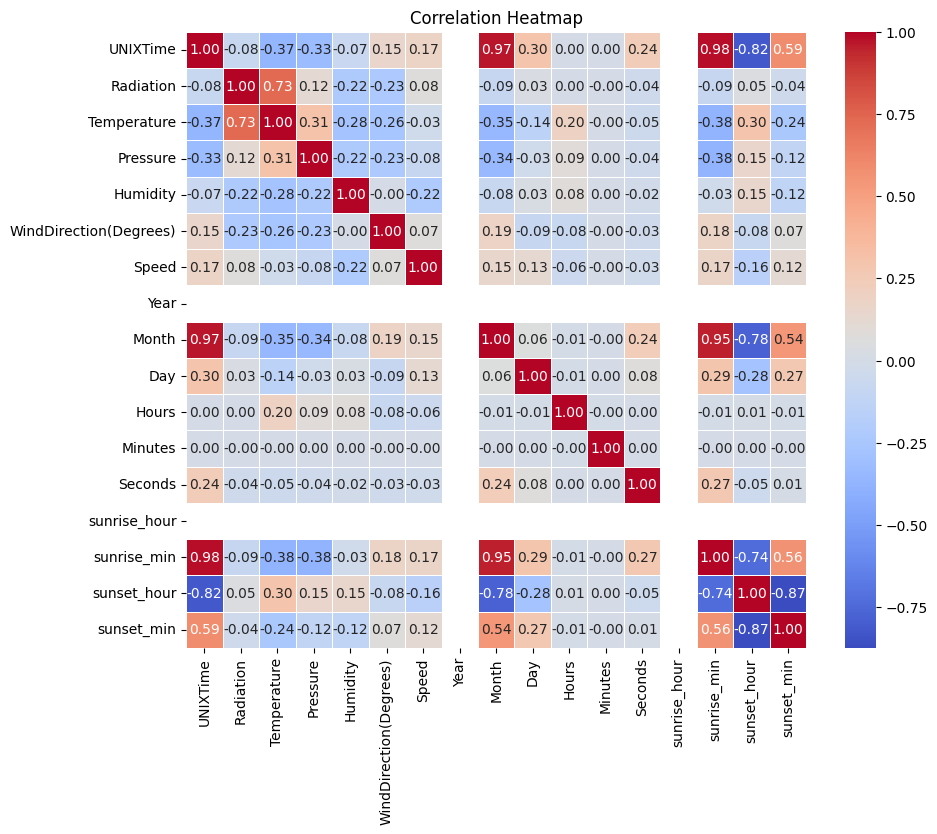

In [192]:

#A cool heatmap to show correlation between different parameters of the data

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')

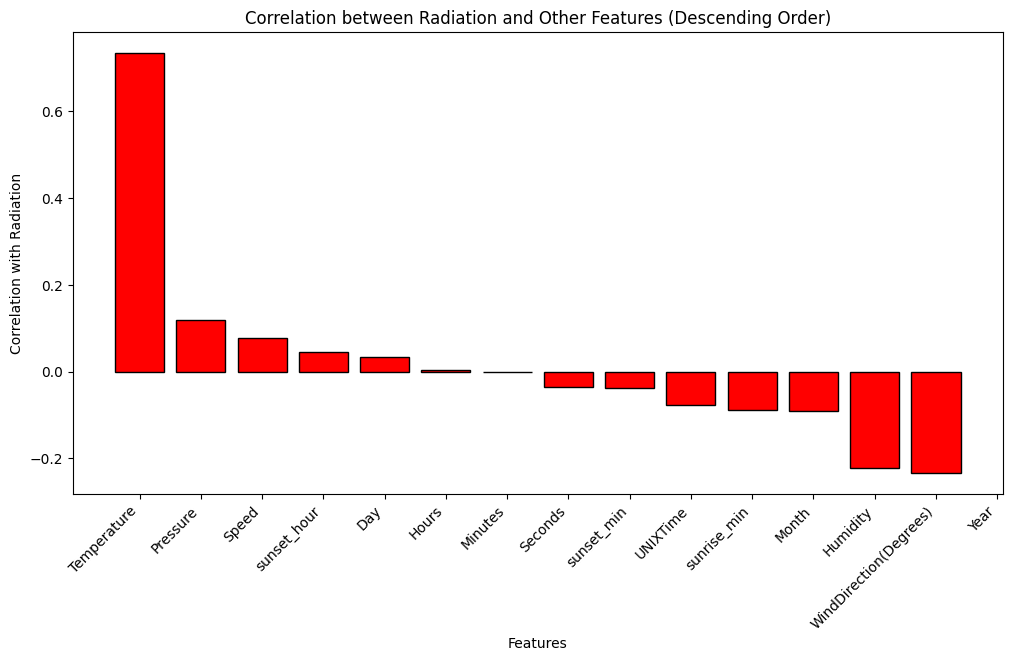

In [193]:
#Plotting bar graph to represent correlation between different features and radiation

radiation_correlation = corr.loc['Radiation', :].drop('Radiation')

# Sorting in descending order
radiation_correlation_sorted = radiation_correlation.sort_values(ascending=False)

# Plotting the correlation values using a bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(radiation_correlation_sorted.index, radiation_correlation_sorted, color='red')
plt.xlabel('Features')
plt.ylabel('Correlation with Radiation')
plt.title('Correlation between Radiation and Other Features (Descending Order)')

# Darken x-axis labels
for bar in bars:
    bar.set_edgecolor('black')

plt.xticks(rotation=45, ha='right')
plt.show()


In [194]:

#Data that is going to used to train and test models

X = data[['Temperature', 'Pressure', 'WindDirection(Degrees)', 'Speed', 'Humidity', 'Month', 'Day', 'Seconds', 'sunset_hour', 'sunset_min', 'sunrise_min']]
y = data['Radiation']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



In [195]:

#Model RandomForestRegressor


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

y_pred_RF = rf_model.predict(x_test)

r_squared_RF = r2_score(y_test, y_pred_RF)
print(f'R2: {r_squared_RF}')

mae_RF = mean_absolute_error(y_test, y_pred_RF)
print(f'MAE: {mae_RF}')

rmse_RF = np.sqrt(mean_squared_error(y_test, y_pred_RF))
print("RMSE: {:.2f}".format(rmse_RF))


R2: 0.9020226576411098
MAE: 50.03072283138755
RMSE: 99.13


In [196]:
#Model ExtraTreesRegressor 

et_model = ExtraTreesRegressor(n_estimators=100)  

et_model.fit(x_train, y_train)

y_pred_ETR = et_model.predict(x_test)


r_squared_ETR = r2_score(y_test, y_pred_ETR)

print(f'R2: {r_squared_ETR}')

mae_ETR= mean_absolute_error(y_test, y_pred_ETR)
print(f'MAE: {mae_ETR}')

rmse_ETR = np.sqrt(mean_squared_error(y_test, y_pred_ETR))
print("RMSE: {:.2f}".format(rmse_ETR))




R2: 0.9025109687945662
MAE: 48.51451681184668
RMSE: 98.89


In [197]:

#Model XGBRegressor


xgb_model = XGBRegressor(learning_rate=0.1,max_depth=8) 


xgb_model.fit(x_train, y_train)

y_pred_XGB = xgb_model.predict(x_test)


r_squared_XGB = r2_score(y_test, y_pred_XGB)
print(f'Mean Squared Error: {r_squared_XGB}')

mae_XGB= mean_absolute_error(y_test, y_pred_XGB)
print(f'MAE: {mae_XGB}')

rmse_XGB = np.sqrt(mean_squared_error(y_test, y_pred_XGB))
print("RMSE: {:.2f}".format(rmse_XGB))




Mean Squared Error: 0.891795345351201
MAE: 56.02161046531865
RMSE: 104.18


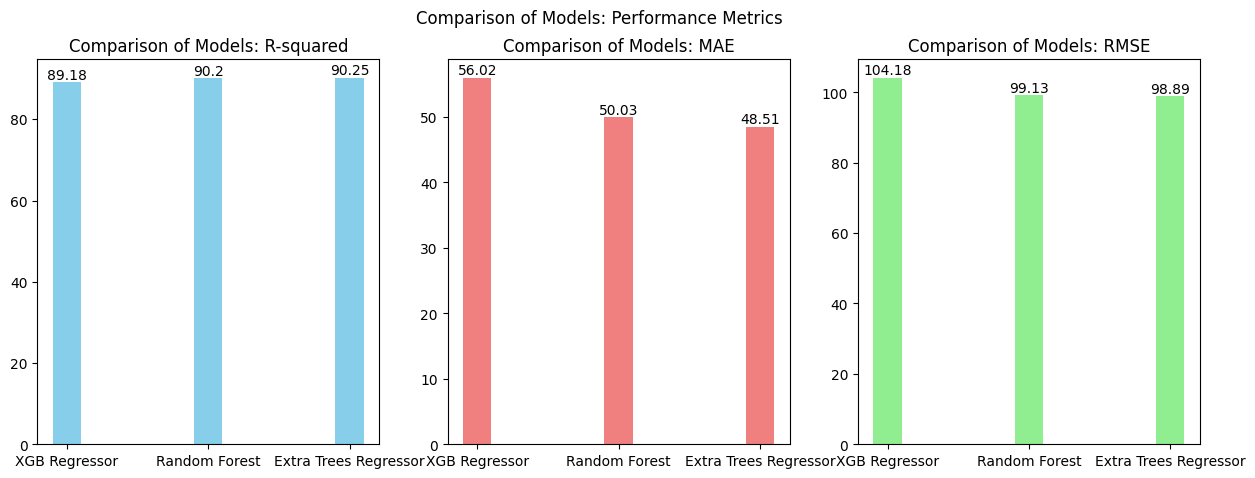

In [198]:
# Graphical representation of R_squared,MAE and RMSE of different models

metrics = ['R-squared', 'MAE', 'RMSE']
models = ['XGB Regressor', 'Random Forest', 'Extra Trees Regressor']

values_r_squared = [r_squared_XGB * 100, r_squared_RF * 100, r_squared_ETR * 100]
values_mae = [mae_XGB, mae_RF, mae_ETR]
values_rmse = [rmse_XGB, rmse_RF, rmse_ETR]

x = np.arange(len(models))
width = 0.2 

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5)) 

# Bar plot for R-squared
bars1 = ax1.bar(x, values_r_squared, width, color='skyblue')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.set_title('Comparison of Models: R-squared')

# Display numerical values for R-squared
for bar, value in zip(bars1, values_r_squared):
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, round(value, 2), ha='center', va='bottom')

# Bar plot for MAE
bars2 = ax2.bar(x, values_mae, width, color='lightcoral')
ax2.set_xticks(x)
ax2.set_xticklabels(models)
ax2.set_title('Comparison of Models: MAE')

# Display numerical values for MAE
for bar, value in zip(bars2, values_mae):
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval, round(value, 2), ha='center', va='bottom')

# Bar plot for RMSE
bars3 = ax3.bar(x, values_rmse, width, color='lightgreen')
ax3.set_xticks(x)
ax3.set_xticklabels(models)
ax3.set_title('Comparison of Models: RMSE')

# Display numerical values for RMSE
for bar, value in zip(bars3, values_rmse):
    yval = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2, yval, round(value, 2), ha='center', va='bottom')

plt.suptitle('Comparison of Models: Performance Metrics')
plt.show()


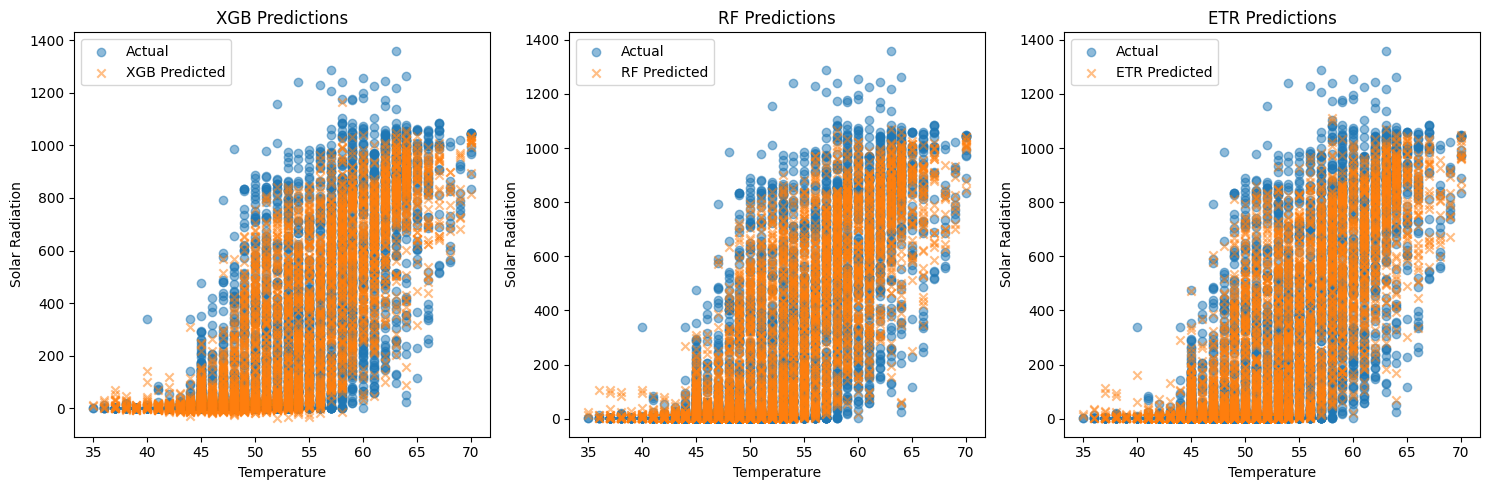

In [199]:
#Actual vs Predictions of temp vs radiation of different models

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Scatter plot for XGB predictions
ax1.scatter(x_test['Temperature'], y_test, label='Actual', alpha=0.5)
ax1.scatter(x_test['Temperature'], y_pred_XGB, label='XGB Predicted', marker='x', alpha=0.5)
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Solar Radiation')
ax1.legend()
ax1.set_title('XGB Predictions')

# Scatter plot for RF predictions
ax2.scatter(x_test['Temperature'], y_test, label='Actual', alpha=0.5)
ax2.scatter(x_test['Temperature'], y_pred_RF, label='RF Predicted', marker='x', alpha=0.5)
ax2.set_xlabel('Temperature')
ax2.set_ylabel('Solar Radiation')
ax2.legend()
ax2.set_title('RF Predictions')

# Scatter plot for ETR predictions
ax3.scatter(x_test['Temperature'], y_test, label='Actual', alpha=0.5)
ax3.scatter(x_test['Temperature'], y_pred_ETR, label='ETR Predicted', marker='x', alpha=0.5)
ax3.set_xlabel('Temperature')
ax3.set_ylabel('Solar Radiation')
ax3.legend()
ax3.set_title('ETR Predictions')

plt.tight_layout()
plt.show()


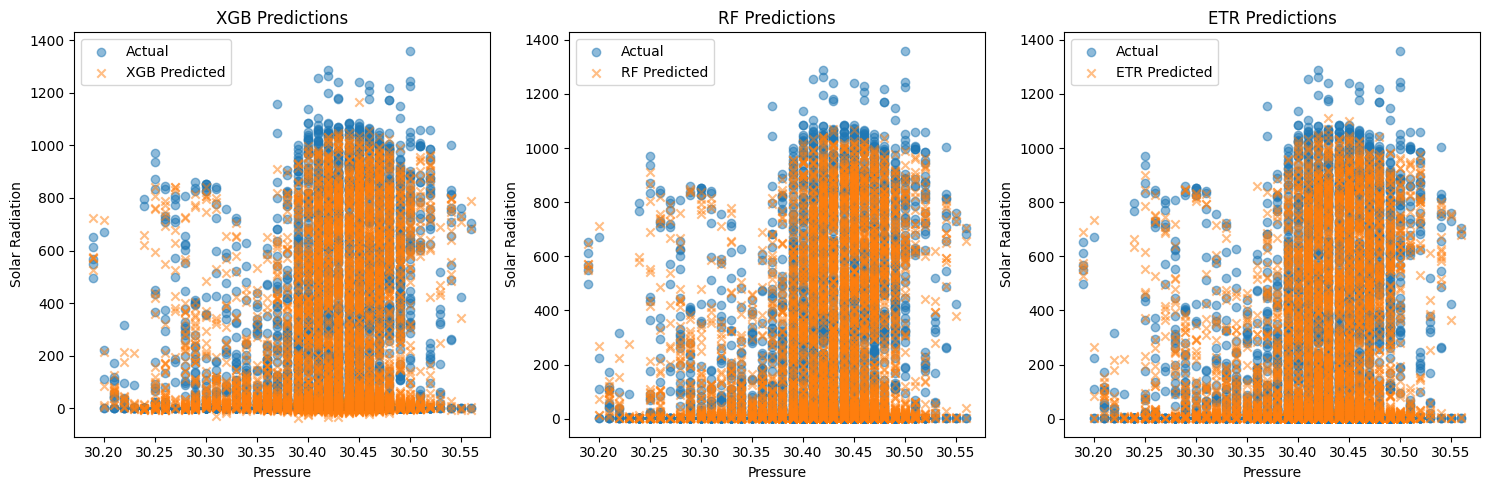

In [200]:
#Actual vs Predictions of pressure vs radiation of different models

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Scatter plot for XGB predictions
ax1.scatter(x_test['Pressure'], y_test, label='Actual', alpha=0.5)
ax1.scatter(x_test['Pressure'], y_pred_XGB, label='XGB Predicted', marker='x', alpha=0.5)
ax1.set_xlabel('Pressure')
ax1.set_ylabel('Solar Radiation')
ax1.legend()
ax1.set_title('XGB Predictions')

# Scatter plot for RF predictions
ax2.scatter(x_test['Pressure'], y_test, label='Actual', alpha=0.5)
ax2.scatter(x_test['Pressure'], y_pred_RF, label='RF Predicted', marker='x', alpha=0.5)
ax2.set_xlabel('Pressure')
ax2.set_ylabel('Solar Radiation')
ax2.legend()
ax2.set_title('RF Predictions')

# Scatter plot for ETR predictions
ax3.scatter(x_test['Pressure'], y_test, label='Actual', alpha=0.5)
ax3.scatter(x_test['Pressure'], y_pred_ETR, label='ETR Predicted', marker='x', alpha=0.5)
ax3.set_xlabel('Pressure')
ax3.set_ylabel('Solar Radiation')
ax3.legend()
ax3.set_title('ETR Predictions')

plt.tight_layout()
plt.show()


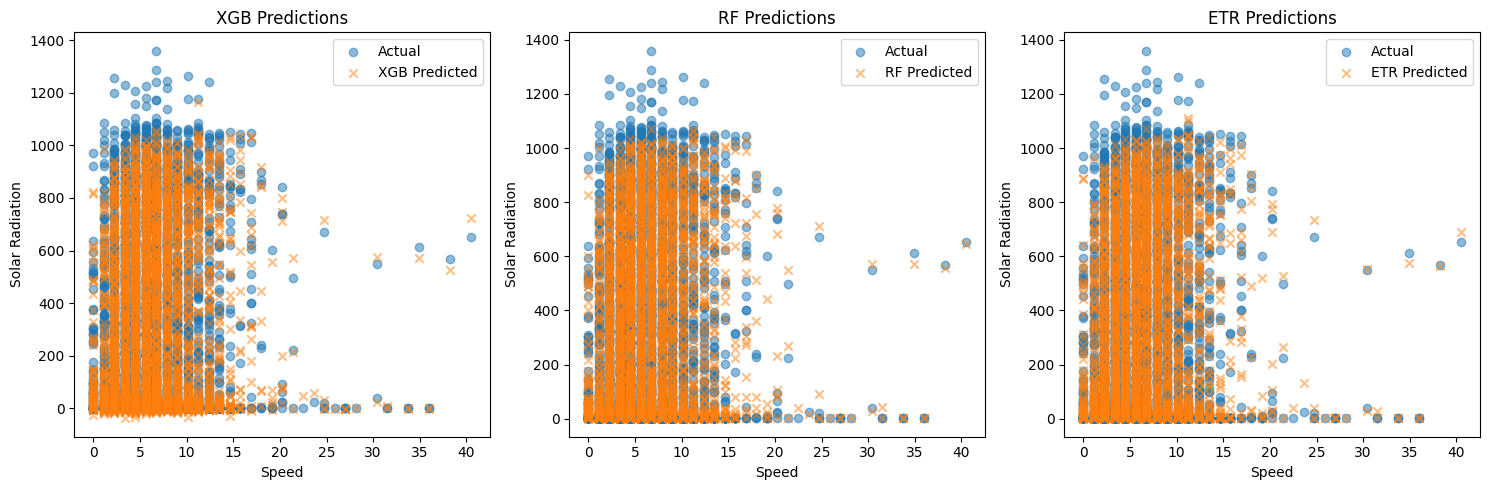

In [201]:
#Actual vs Predictions of Speed vs radiation of different models

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Scatter plot for XGB predictions
ax1.scatter(x_test['Speed'], y_test, label='Actual', alpha=0.5)
ax1.scatter(x_test['Speed'], y_pred_XGB, label='XGB Predicted', marker='x', alpha=0.5)
ax1.set_xlabel('Speed')
ax1.set_ylabel('Solar Radiation')
ax1.legend()
ax1.set_title('XGB Predictions')

# Scatter plot for RF predictions
ax2.scatter(x_test['Speed'], y_test, label='Actual', alpha=0.5)
ax2.scatter(x_test['Speed'], y_pred_RF, label='RF Predicted', marker='x', alpha=0.5)
ax2.set_xlabel('Speed')
ax2.set_ylabel('Solar Radiation')
ax2.legend()
ax2.set_title('RF Predictions')

# Scatter plot for ETR predictions
ax3.scatter(x_test['Speed'], y_test, label='Actual', alpha=0.5)
ax3.scatter(x_test['Speed'], y_pred_ETR, label='ETR Predicted', marker='x', alpha=0.5)
ax3.set_xlabel('Speed')
ax3.set_ylabel('Solar Radiation')
ax3.legend()
ax3.set_title('ETR Predictions')

plt.tight_layout()
plt.show()
